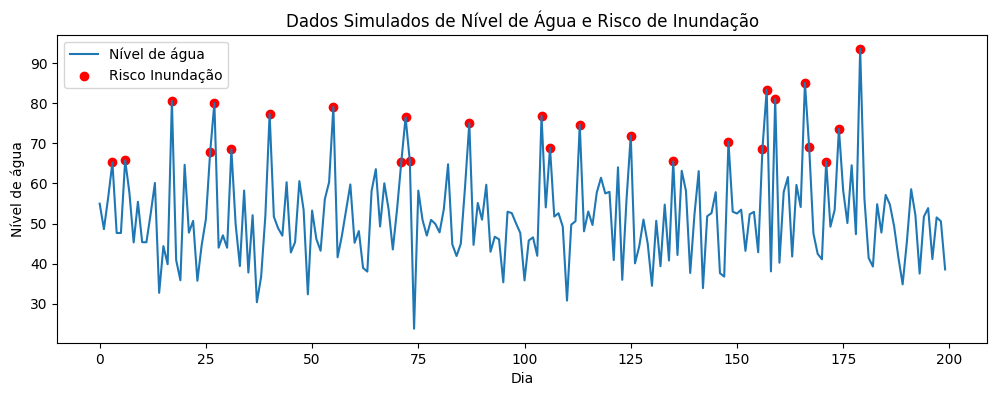

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fixar random seed para reproducibilidade
np.random.seed(42)

# Simular dados para 200 dias
dias = 200
nivel_agua = np.random.normal(loc=50, scale=10, size=dias)  # nível médio 50, desvio 10

# picos para representar elevação do nível de água em alguns dias
picos = np.random.choice(dias, size=20, replace=False)
nivel_agua[picos] += np.random.uniform(15, 30, size=20)  # picos de 15 a 30 unidades

# risco de inundação (1 se nível > 65, 0 caso contrário)
risco_inundacao = (nivel_agua > 65).astype(int)

# DataFrame
df = pd.DataFrame({
    'dia': np.arange(dias),
    'nivel_agua': nivel_agua,
    'risco_inundacao': risco_inundacao
})

# Visualizar os dados
plt.figure(figsize=(12,4))
plt.plot(df['dia'], df['nivel_agua'], label='Nível de água')
plt.scatter(df['dia'][df['risco_inundacao'] == 1], df['nivel_agua'][df['risco_inundacao'] == 1], color='red', label='Risco Inundação')
plt.xlabel('Dia')
plt.ylabel('Nível de água')
plt.legend()
plt.title('Dados Simulados de Nível de Água e Risco de Inundação')
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separar features e alvo
X = df[['nivel_agua']]
y = df['risco_inundacao']

# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prever
y_pred = model.predict(X_test)

# Avaliar desempenho
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Matriz de Confusão:
[[34  0]
 [ 0  6]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00         6

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [5]:
# Simular novo dado (nível de água de amanhã)
novo_nivel = 70  # Exemplo: um nível elevado

# Fazer a previsão
risco = model.predict([[novo_nivel]])
print(f"Nível de água: {novo_nivel} => Risco de inundação: {'SIM' if risco[0] == 1 else 'NÃO'}")


Nível de água: 70 => Risco de inundação: SIM


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [7]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. Treino(mesmo código do exemplo anterior)
def treinar_modelo():
    np.random.seed(42)
    dias = 200
    nivel_agua = np.random.normal(loc=50, scale=10, size=dias)
    picos = np.random.choice(dias, size=20, replace=False)
    nivel_agua[picos] += np.random.uniform(15, 30, size=20)
    risco_inundacao = (nivel_agua > 65).astype(int)

    X = nivel_agua.reshape(-1,1)
    y = risco_inundacao

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    return model

# 2. Função para simular envio de dados e prever risco em tempo real
def simular_sensor_e_prever(modelo, num_iter=30, delay=1):
    np.random.seed(100)
    for _ in range(num_iter):
        # Simular um valor de nível de água (entre 30 e 100)
        nivel_agua = np.random.uniform(30, 100)
        print(f"Nível de água simulado: {nivel_agua:.2f}")

        risco = modelo.predict([[nivel_agua]])
        print(f"Previsão de risco de inundação: {'SIM' if risco[0] == 1 else 'NÃO'}\n")

        time.sleep(delay)

# --- Execução do projeto ---

if __name__ == "__main__":
    modelo = treinar_modelo()
    simular_sensor_e_prever(modelo)


Nível de água simulado: 68.04
Previsão de risco de inundação: SIM

Nível de água simulado: 49.49
Previsão de risco de inundação: NÃO

Nível de água simulado: 59.72
Previsão de risco de inundação: NÃO

Nível de água simulado: 89.13
Previsão de risco de inundação: SIM



KeyboardInterrupt: 

In [ ]:
# Instalar dependências
#aqui esta o codigo de conexão com os aparlhos IOT
!pip install flask pyngrok

from flask import Flask, request, jsonify
from pyngrok import ngrok
import threading

app = Flask(__name__)

@app.route('/sensor', methods=['POST'])
def sensor_data():
    data = request.get_json()
    nivel_agua = data.get('nivel_agua')
    risco = "SIM" if nivel_agua > 65 else "NÃO"
    print(f"Nível de água recebido: {nivel_agua} - Risco: {risco}")
    return jsonify({"risco_inundacao": risco})

def run_app():
    app.run(port=5000)

# Criar túnel ngrok na porta 5000
public_url = ngrok.connect(5000)
print("Ngrok URL pública:", public_url)

# Rodar Flask em uma thread separada
threading.Thread(target=run_app).start()
